# Binary Image Classifier | Happy-Neutral

This aim of this project is to train deep learning models using the TensorFlow framework for the purpose of binary image classification for facial emotion recognition. The images used to train the models were retrieved from the __FER2013 dataset__ and the deep learning architecture used to build the models is __Convolutional Neural Network__. Seven different models were trained with a varying number of layers.
The emotions used on this image classifier are __happy__ and __neutral__. 
Unlike the other image classifiers used in this project, the dataset in this classifier is greatly imbalance, with the images from the happy folder being almost double that of the neutral folder. Data augmentation was implemented to improved the trained model. The effect of this can be seen in the result of this experiment.

In [38]:
import tensorflow as tf
import os

import cv2
import imghdr
import pandas
import pathlib

import numpy as np
import PIL
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [39]:
data_dir = "data/train"
os.listdir(data_dir)

['happy', 'neutral']

In [41]:
#Data count

data_path = pathlib.Path(data_dir)

image_count = len(list(data_path.glob('*/*.jpg')))
happy_image_count = len(list(data_path.glob('happy/*.jpg')))
neutral_image_count = len(list(data_path.glob('neutral/*.jpg')))
print("Happy: ", happy_image_count, "|", "Neutral: ", neutral_image_count)

Happy:  7215 | Neutral:  4965


In [42]:
print("Total number of training images: ", image_count)

Total number of training images:  12180


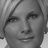

In [43]:
happy = list(data_path.glob('happy/*'))
PIL.Image.open(str(happy[1]))

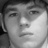

In [44]:
neutral = list(data_path.glob('neutral/*'))
PIL.Image.open(str(neutral[1]))

### Load Data

In [66]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=16)

Found 12180 files belonging to 2 classes.


In [67]:
data_iterator = data.as_numpy_iterator()

In [68]:
batch = data_iterator.next()

In [69]:
batch[0].shape

(16, 256, 256, 3)

In [70]:
class_names = data.class_names
print(class_names)

['happy', 'neutral']


### Data Visualisation

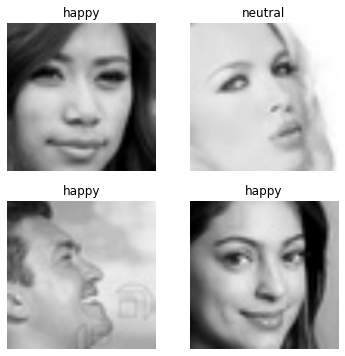

In [71]:
plt.figure(figsize=(6, 6))
for images, labels in data.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### Scaling the data

In [51]:
data = data.map(lambda x,y: (x/255, y))

In [52]:
batchh = data.as_numpy_iterator().next()

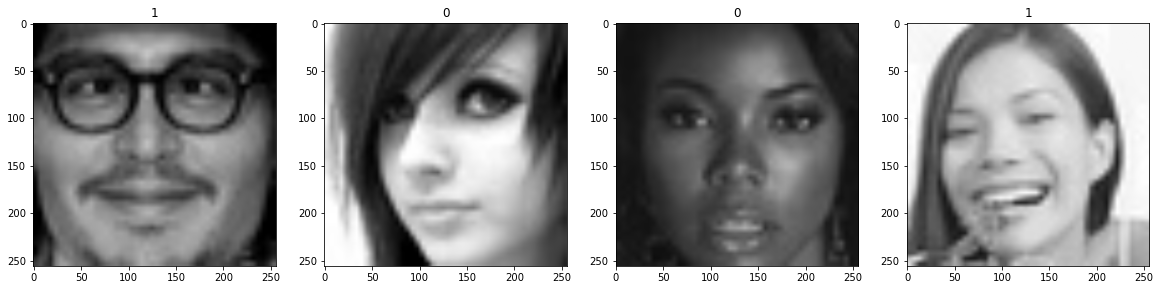

In [62]:
# Visualising the scaled data

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batchh[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    

### Splitting the data

In [72]:
# number of batches
len(data)

762

In [78]:
train_size = int(len(data)*.8) # 80% of data for training
val_size = int(len(data)*.2)+1 # 20% of data for validation

In [79]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [80]:
len(train)

609

In [81]:
len(val)

153

### Building the deep learning model

#### 2 Layers

In [82]:
mod_2 = Sequential()

mod_2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_2.add(MaxPooling2D())

mod_2.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_2.add(MaxPooling2D())

mod_2.add(Flatten())

mod_2.add(Dense(256, activation='relu'))
mod_2.add(Dense(1, activation='sigmoid'))

In [83]:
mod_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [85]:
mod_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 256)               3

#### 3 Layers

In [181]:
mod_3 = Sequential()

mod_3.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Flatten())

mod_3.add(Dense(256, activation='relu'))
mod_3.add(Dense(1, activation='sigmoid'))

In [182]:
mod_3.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [183]:
mod_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 16)      

#### 4 Layers

In [184]:
mod_4 = Sequential()

mod_4.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Flatten())

mod_4.add(Dense(256, activation='relu'))
mod_4.add(Dense(1, activation='sigmoid'))

In [185]:
mod_4.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [186]:
mod_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)      

#### 5 Layers

In [187]:
mod_5 = Sequential()

mod_5.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Flatten())

mod_5.add(Dense(256, activation='relu'))
mod_5.add(Dense(1, activation='sigmoid'))

In [188]:
mod_5.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [189]:
mod_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 32)      

#### Training the model

In [86]:
logdir='logs'

In [87]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [88]:
hist_2 = mod_2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
609/609 [==============================] - 212s 347ms/step - loss: 20.4503 - accuracy: 0.5875 - val_loss: 0.6666 - val_accuracy: 0.6018
Epoch 2/20
609/609 [==============================] - 213s 349ms/step - loss: 0.6106 - accuracy: 0.6574 - val_loss: 0.6467 - val_accuracy: 0.6548
Epoch 3/20
609/609 [==============================] - 214s 351ms/step - loss: 0.4829 - accuracy: 0.7672 - val_loss: 0.6974 - val_accuracy: 0.5981
Epoch 4/20
609/609 [==============================] - 241s 396ms/step - loss: 0.3979 - accuracy: 0.8104 - val_loss: 0.8160 - val_accuracy: 0.6318
Epoch 5/20
609/609 [==============================] - 219s 359ms/step - loss: 0.2350 - accuracy: 0.8986 - val_loss: 1.2020 - val_accuracy: 0.6568
Epoch 6/20
609/609 [==============================] - 230s 378ms/step - loss: 0.1612 - accuracy: 0.9365 - val_loss: 1.5900 - val_accuracy: 0.6564
Epoch 7/20
609/609 [==============================] - 235s 385ms/step - loss: 0.1233 - accuracy: 0.9586 - val_loss: 1.3714 

In [193]:
hist_3 = mod_3.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
609/609 [==============================] - 172s 282ms/step - loss: 0.8459 - accuracy: 0.5858 - val_loss: 0.6719 - val_accuracy: 0.5985
Epoch 2/20
609/609 [==============================] - 168s 276ms/step - loss: 0.6690 - accuracy: 0.6052 - val_loss: 0.6714 - val_accuracy: 0.5989
Epoch 3/20
609/609 [==============================] - 167s 274ms/step - loss: 0.6513 - accuracy: 0.6220 - val_loss: 0.6938 - val_accuracy: 0.5977
Epoch 4/20
609/609 [==============================] - 171s 280ms/step - loss: 0.6355 - accuracy: 0.6339 - val_loss: 0.7218 - val_accuracy: 0.5952
Epoch 5/20
609/609 [==============================] - 177s 291ms/step - loss: 0.6162 - accuracy: 0.6439 - val_loss: 0.7705 - val_accuracy: 0.5878
Epoch 6/20
609/609 [==============================] - 182s 298ms/step - loss: 0.5991 - accuracy: 0.6560 - val_loss: 0.7984 - val_accuracy: 0.5874
Epoch 7/20
609/609 [==============================] - 182s 299ms/step - loss: 0.5902 - accuracy: 0.6644 - val_loss: 0.7686 -

In [194]:
hist_4 = mod_4.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
609/609 [==============================] - 187s 306ms/step - loss: 1.1478 - accuracy: 0.5866 - val_loss: 0.6735 - val_accuracy: 0.5989
Epoch 2/20
609/609 [==============================] - 187s 308ms/step - loss: 0.6715 - accuracy: 0.6007 - val_loss: 0.6754 - val_accuracy: 0.5952
Epoch 3/20
609/609 [==============================] - 187s 307ms/step - loss: 0.6697 - accuracy: 0.6053 - val_loss: 0.6911 - val_accuracy: 0.5924
Epoch 4/20
609/609 [==============================] - 200s 328ms/step - loss: 0.6670 - accuracy: 0.6068 - val_loss: 0.6973 - val_accuracy: 0.5891
Epoch 5/20
609/609 [==============================] - 203s 333ms/step - loss: 0.6641 - accuracy: 0.6100 - val_loss: 0.6936 - val_accuracy: 0.5891
Epoch 6/20
609/609 [==============================] - 200s 328ms/step - loss: 0.6550 - accuracy: 0.6174 - val_loss: 0.7050 - val_accuracy: 0.5956
Epoch 7/20
609/609 [==============================] - 204s 334ms/step - loss: 0.6482 - accuracy: 0.6214 - val_loss: 0.7201 -

In [195]:
hist_5 = mod_5.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
609/609 [==============================] - 171s 279ms/step - loss: 0.7218 - accuracy: 0.5937 - val_loss: 0.6098 - val_accuracy: 0.6667
Epoch 2/20
609/609 [==============================] - 176s 290ms/step - loss: 0.5654 - accuracy: 0.7031 - val_loss: 0.5516 - val_accuracy: 0.7217
Epoch 3/20
609/609 [==============================] - 175s 287ms/step - loss: 0.5042 - accuracy: 0.7524 - val_loss: 0.4761 - val_accuracy: 0.7697
Epoch 4/20
609/609 [==============================] - 175s 288ms/step - loss: 0.4577 - accuracy: 0.7801 - val_loss: 0.4586 - val_accuracy: 0.7869
Epoch 5/20
609/609 [==============================] - 178s 292ms/step - loss: 0.4355 - accuracy: 0.7966 - val_loss: 0.4409 - val_accuracy: 0.7886
Epoch 6/20
609/609 [==============================] - 165s 271ms/step - loss: 0.4069 - accuracy: 0.8127 - val_loss: 0.4423 - val_accuracy: 0.7857
Epoch 7/20
609/609 [==============================] - 168s 276ms/step - loss: 0.3912 - accuracy: 0.8198 - val_loss: 0.4553 -

### Checking Model Performance

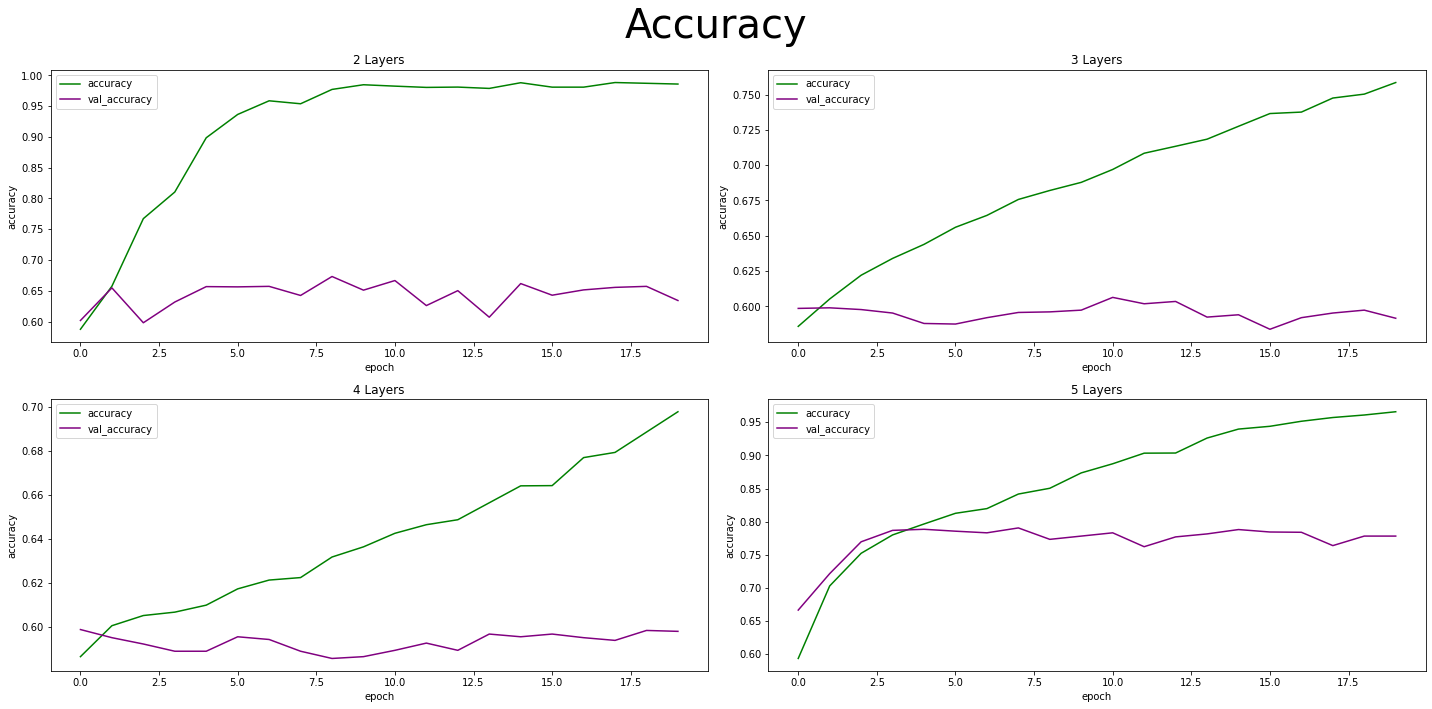

In [196]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Accuracy', fontsize=40)
axs[0, 0].plot(hist_2.history['accuracy'], color='green', label='accuracy')
axs[0, 0].plot(hist_2.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['accuracy'], color='green', label='accuracy')
axs[0, 1].plot(hist_3.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['accuracy'], color='green', label='accuracy')
axs[1, 0].plot(hist_4.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['accuracy'], color='green', label='accuracy')
axs[1, 1].plot(hist_5.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')


fig.tight_layout()


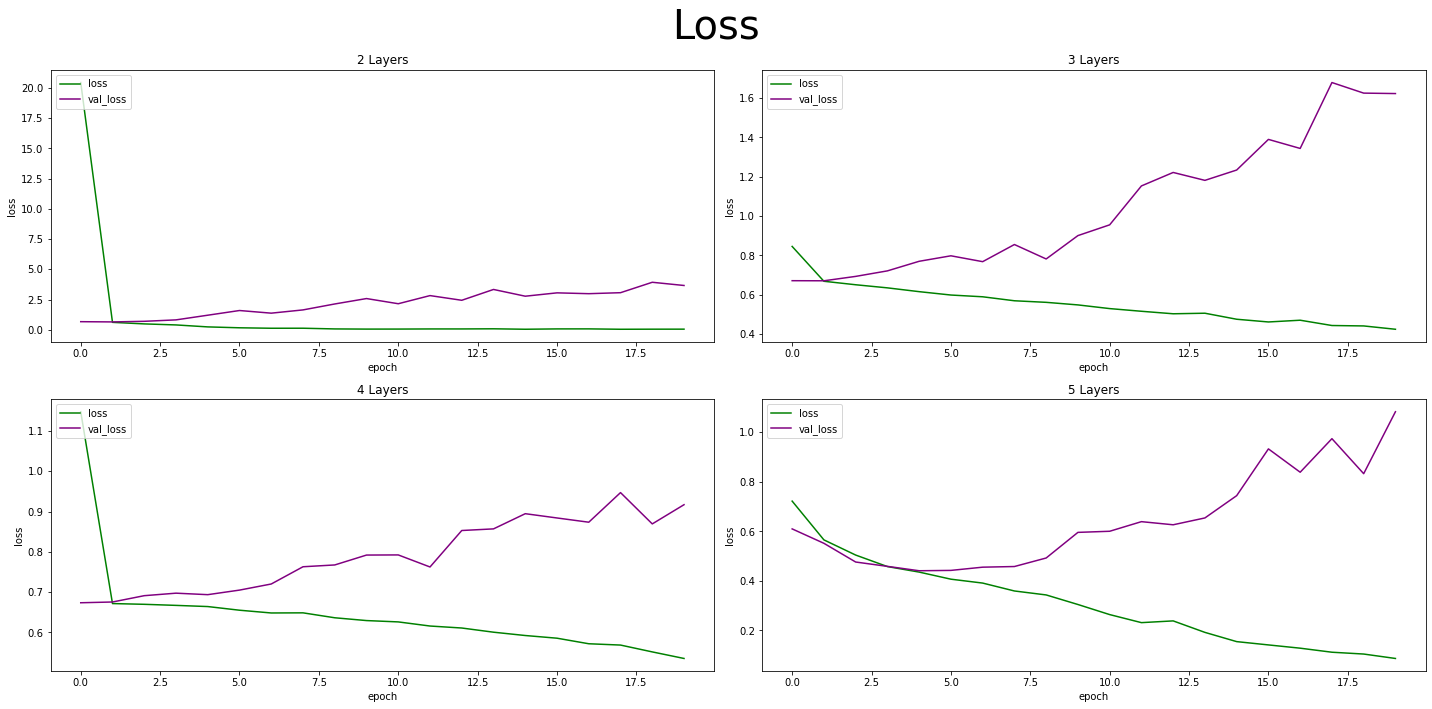

In [197]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Loss', fontsize=40)
axs[0, 0].plot(hist_2.history['loss'], color='green', label='loss')
axs[0, 0].plot(hist_2.history['val_loss'], color='purple', label='val_loss')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['loss'], color='green', label='loss')
axs[0, 1].plot(hist_3.history['val_loss'], color='purple', label='val_loss')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['loss'], color='green', label='loss')
axs[1, 0].plot(hist_4.history['val_loss'], color='purple', label='val_loss')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['loss'], color='green', label='loss')
axs[1, 1].plot(hist_5.history['val_loss'], color='purple', label='val_loss')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')


fig.tight_layout()

### Augmenting the data

In [201]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

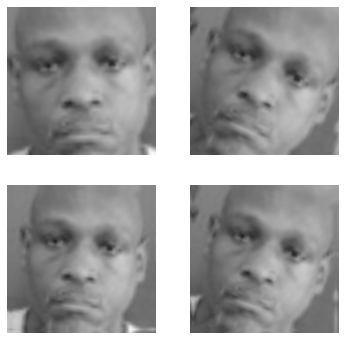

In [202]:
plt.figure(figsize=(6, 6))
for images, _ in train.take(1):
  for i in range(4):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


### Adding a dropout layer

In [203]:
mod_5d = Sequential()

mod_5d.add(data_augmentation)

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Dropout(0.2))

mod_5d.add(Flatten())

mod_5d.add(Dense(256, activation='relu'))
mod_5d.add(Dense(1, activation='sigmoid'))

In [204]:
mod_5d.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [205]:
mod_5d.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 32)       

In [207]:
hist_5d = mod_5d.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
609/609 [==============================] - 220s 359ms/step - loss: 0.7002 - accuracy: 0.5877 - val_loss: 0.6723 - val_accuracy: 0.5985
Epoch 2/20
609/609 [==============================] - 225s 370ms/step - loss: 0.6756 - accuracy: 0.5937 - val_loss: 0.6708 - val_accuracy: 0.6010
Epoch 3/20
609/609 [==============================] - 222s 365ms/step - loss: 0.6786 - accuracy: 0.5905 - val_loss: 0.6746 - val_accuracy: 0.5952
Epoch 4/20
609/609 [==============================] - 208s 341ms/step - loss: 0.6764 - accuracy: 0.5906 - val_loss: 0.6697 - val_accuracy: 0.5977
Epoch 5/20
609/609 [==============================] - 207s 340ms/step - loss: 0.6540 - accuracy: 0.6135 - val_loss: 0.7444 - val_accuracy: 0.5936
Epoch 6/20
609/609 [==============================] - 210s 345ms/step - loss: 0.6560 - accuracy: 0.6121 - val_loss: 0.5325 - val_accuracy: 0.7262
Epoch 7/20
609/609 [==============================] - 204s 336ms/step - loss: 0.5712 - accuracy: 0.6946 - val_loss: 0.5014 -

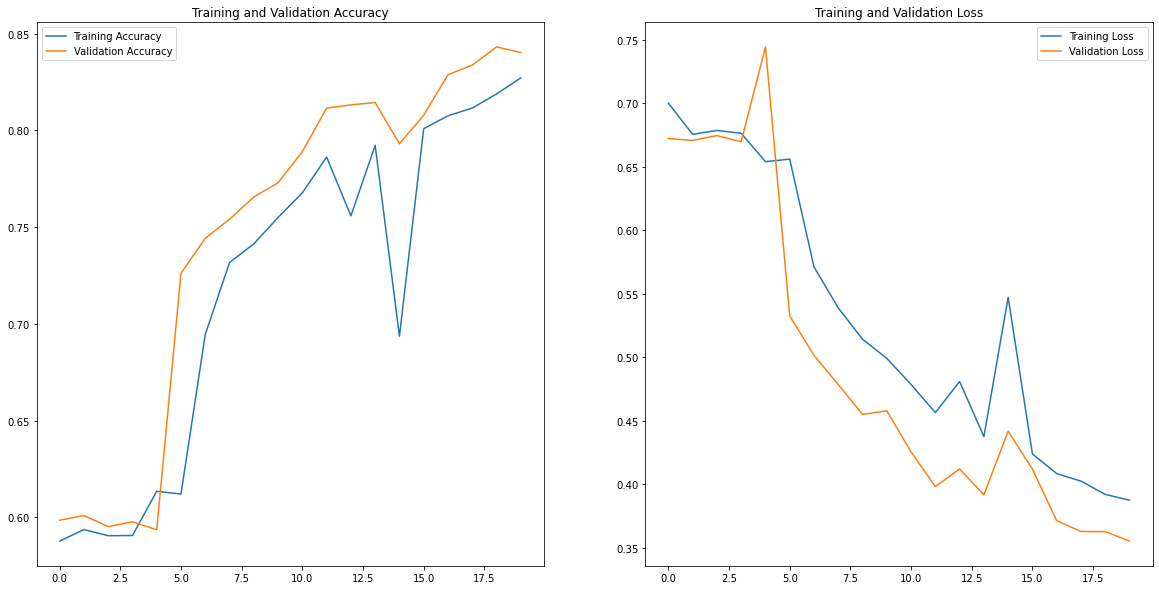

In [208]:
acc = hist_5d.history['accuracy']
val_acc = hist_5d.history['val_accuracy']

loss = hist_5d.history['loss']
val_loss = hist_5d.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Evaluating the model

In [209]:
import pandas as pd

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [210]:
test_dir = 'data/test'

In [283]:
test = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=753)

Found 3007 files belonging to 2 classes.


In [284]:
test_iterator = test.as_numpy_iterator()

In [285]:
test_batch = test_iterator.next()

In [286]:
test_batch[0].shape

(753, 256, 256, 3)

In [287]:
pre = Precision()
re = Recall()
biacc = BinaryAccuracy()

In [288]:
for test_batch in test.as_numpy_iterator(): 
    X, y = test_batch
    yhat = mod_5.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    biacc.update_state(y, yhat)

In [289]:
yhat.shape

(748, 1)

In [290]:
y.shape

(748,)

In [291]:
thresh = 0.5

yhat_binary = np.where(yhat > thresh, 1, 0)

In [292]:
yhat_binary

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [293]:
yy = yhat_binary.reshape(748)
yy.shape

(748,)

In [294]:
df = pandas.DataFrame({"True": y, "Pred": yy})
print(df)

     True  Pred
0       1     1
1       0     0
2       0     0
3       0     0
4       1     1
..    ...   ...
743     0     0
744     1     1
745     1     1
746     0     0
747     0     0

[748 rows x 2 columns]


In [295]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{biacc.result().numpy()}')

Precision: 0.7260578870773315, Recall:0.7931873202323914, Accuracy:0.7925090789794922


In [296]:
cm = confusion_matrix(y, yy)

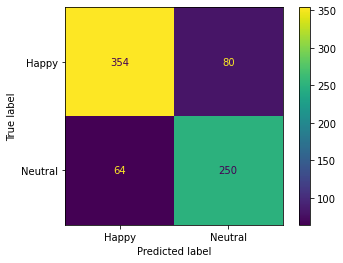

In [297]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Happy', 'Neutral'])

cm_display.plot()
plt.show()

In [298]:
from sklearn.metrics import roc_curve, auc

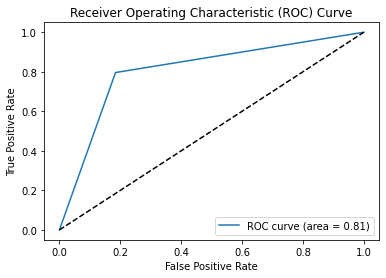

In [299]:
fpr, tpr, thresholds = roc_curve(y, yy)

# Computing the AUC score
roc_auc = auc(fpr, tpr)

#Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Image Prediction

In [301]:
from tensorflow.keras.preprocessing import image

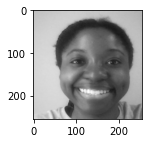

In [314]:
test_image = image.load_img('/Users/moyojimi/Desktop/Dissertation/Code/imgtest/happ.jpg', target_size = (255,255))
plt.figure(figsize=(2, 2))
plt.imshow(test_image);

In [315]:
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = mod_5d.predict(test_image)

In [316]:
result

array([[0.48371807]], dtype=float32)

In [326]:
rr = result.reshape(1)
hap_conf = round(rr[0] * 100, 2)
neut_conf = round(100-(rr[0] * 100), 2)

print(f'Emotion prediction\n\nHappy: {hap_conf}%\nNeutral: {neut_conf}%')

Emotion prediction

Happy: 48.37%
Neutral: 51.63%


In [327]:
if result < 0.5: 
    print(f'Predicted class is Neutral')
else:
    print(f'Predicted class is Happy')

Predicted class is Neutral


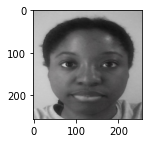

In [323]:
test_image2 = image.load_img('/Users/moyojimi/Desktop/Dissertation/Code/imgtest/neut.jpg', target_size = (256,256))
plt.figure(figsize=(2, 2))
plt.imshow(test_image2);

In [324]:
test_image2 = image.img_to_array(test_image2)
test_image2 = test_image2/255
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = mod_5d.predict(test_image2)
result2

array([[0.48371807]], dtype=float32)

In [328]:
rr2 = result2.reshape(1)
hap_conf2 = round(rr2[0] * 100, 2)
neut_conf2 = round(100-(rr2[0] * 100), 2)

print(f'Emotion prediction\n\nHappy: {hap_conf2}%\nNeutral: {neut_conf2}%')

Emotion prediction

Happy: 48.37%
Neutral: 51.63%


In [325]:
if result2 > 0.5: 
    print(f'Predicted class is Neutral')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


## Conclusion

For this classifier, the model was trained on an imbalanced dataset and the results from the experimentation show that using an imbalanced dataset to train deep learning models negatively affect the performance of the model. This is proved by the prediction used to evaluate the model where the result is skewed towards the larger dataset. Compared to the other classifiers used for this project, the result achieved from this image classifier is very poor. This shows that it is important to use a balanced dataset to ensure that the deep learning model performs optimally.